<a href="https://colab.research.google.com/github/JasonTPhillipsJr/Data_Preprocessing_Projects/blob/V1.01/Classification_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project 3

import numpy as np #For linear algebra
import pandas as pd #For data Preprocessing
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree

from matplotlib import pyplot as plt
from scipy import stats

#Reading the data
df = pd.read_csv("https://raw.githubusercontent.com/JasonTPhillipsJr/Data_Preprocessing_Projects/main/Churn_Modelling.csv")

#Normalizing the data (may not be needed for now)
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

#Scrambles the data around.
#df = df.reindex(np.random.permutation(df.index)) 
#df.reset_index(inplace = True, drop = True)

df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
"""
We need to convert two attributes into float values so that they can be used in some of the classification functions.
We are going to convert Geography and Gender into numerical values so that they can be used in mathematical functions.
"""
#Printing the unique values for geography.
uniqueValues = df['Geography'].nunique(dropna=False)
print("Number of unique values in this Geography: ", uniqueValues)
df.Geography.unique()



Number of unique values in this Geography:  3


array(['France', 'Spain', 'Germany'], dtype=object)

In [3]:
#Replace the unique values in the Geography Attribute with numerical values
#1 = France, 2 = Spain, 3 = Germany
df['Geography'] = df['Geography'].replace('France', 1)
df['Geography'] = df['Geography'].replace('Spain', 2)
df['Geography'] = df['Geography'].replace('Germany', 3)

#Replace the Male and Female with 1 and 2
df['Gender'] = df['Gender'].replace('Male', 1)
df['Gender'] = df['Gender'].replace('Female', 2)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,1,2,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,2,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,1,2,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,1,2,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,2,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,1,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,1,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,1,2,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,3,1,42,3,75075.31,2,1,0,92888.52,1


In [4]:
#Normalize the data


In [5]:
"""
What we are trying to do with this dataset is classify whether a customer will Exit or Not Exit based off
their other attributes.
   
The attributes we are concerened with are: Credit Score, Region, Gender, Age, Tenure, Balance, NumOfProducts,
HasCrCard, IsActiveMember,Salary.
"""
#Setup the training and testing data.
numInstances = 10000
numTrain = 2000
numTest = numInstances - numTrain

#Create the training and testing datasets.
trainingData = df[:numTest]
testData = df[numTest:]

#Creating our X and Y datasets
Y = pd.DataFrame(trainingData, columns = ["Exited"])
X = trainingData.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis = 1)

#Creating the Classification Tree
clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3) #We should keep an eye on the max depth to adjust the tree.
clf = clf.fit(X,Y)

#Print out the X dataset (our inputs)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,1,2,42,2,0.00,1,1,1,101348.88
1,608,2,2,41,1,83807.86,1,0,1,112542.58
2,502,1,2,42,8,159660.80,3,1,0,113931.57
3,699,1,2,39,1,0.00,2,0,0,93826.63
4,850,2,2,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
7995,708,1,2,67,1,0.00,2,0,1,3837.08
7996,717,1,2,22,5,112465.06,1,1,1,92977.75
7997,465,3,1,24,6,156007.09,1,1,0,191368.37
7998,829,3,1,28,3,132405.52,3,1,0,104889.20


In [6]:
#Print out the Y dataset (our possible outputs)
Y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
7995,0
7996,0
7997,0
7998,1


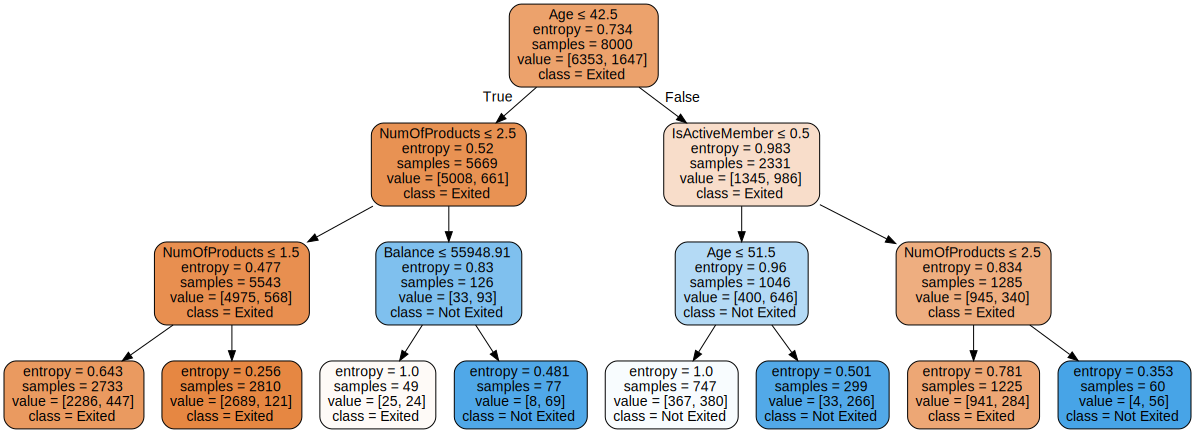

In [7]:
#Create the data for the graph
dot_data = tree.export_graphviz(clf, out_file = None, feature_names = X.columns, class_names = ['Exited', 'Not Exited'],
                                filled = True, rounded = True, special_characters = True)
#Create the graph to display the data.
graph = graphviz.Source(dot_data)
graph

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')